In [ ]:
import torch.nn as nn
class Focus(nn.Module):
    """Focus width and height information into channel space."""

    def __init__(self, in_channels, out_channels, ksize=1, stride=1, act="silu"):
        super().__init__()
#         self.conv = BaseConv(in_channels * 4, out_channels, ksize, stride, act=act)

    def forward(self, x):
        # shape of x (b,c,w,h) -> y(b,4c,w/2,h/2)
        patch_top_left = x[..., ::2, ::2]
        patch_top_right = x[..., ::2, 1::2]
        patch_bot_left = x[..., 1::2, ::2]
        patch_bot_right = x[..., 1::2, 1::2]
        x = torch.cat(
            (
                patch_top_left,
                patch_bot_left,
                patch_top_right,
                patch_bot_right,
            ),
            dim=1,
        )
        return x#self.conv(x)


In [2]:
import torch
c = 3
w = h = 640
inp = torch.arange(1*c*h*w).reshape([1,c,h,w])
fc = Focus(1,2)

out_fc = fc(inp)
map_ids = out_fc.view(-1)

In [3]:
# inp

In [56]:
import mmcv
from avcv.visualize import *

img = mmcv.imread('../datasets/tsd/vinai_bdi_combined/test-images/100_oceanpark-trs-cam120_labeling_1_download_(1)_1610389951_012358.jpeg', channel_order='rgb')


In [57]:
img = mmcv.imrescale(img, (h,w))
img = mmcv.impad(img, shape=(h,w))

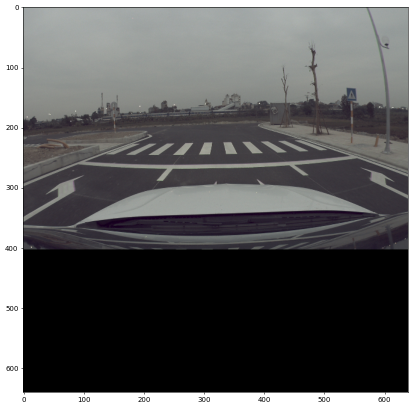

In [58]:
show(img, dpi=50)

In [59]:
inp = torch.from_numpy(img)[None].permute([0,3,1,2])

In [60]:
def plot(x):
    pads = []
    for i in range(4):
        pads.append(x[0,i*3:i*3+3].permute([1,2,0]).cpu().numpy())
    for pad in pads:
        show(pad, dpi=20)
#     plot_images(pads, dpi=100)
    return pads

torch.Size([1, 12, 320, 320])


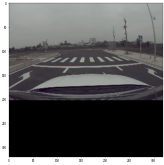

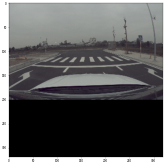

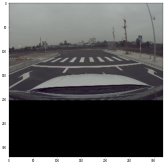

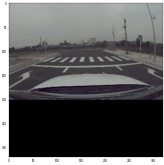

In [61]:
y1 = inp.reshape(-1)[map_ids]
y1 = y1.reshape([1,c*4, h//2,w//2])
print(y1.shape)
pads = plot(y1)

In [54]:
# pads[0]==pads[

In [43]:
y2 = fc(inp)
y1.shape, y1.shape

(torch.Size([1, 12, 320, 320]), torch.Size([1, 12, 320, 320]))

(2, 2)


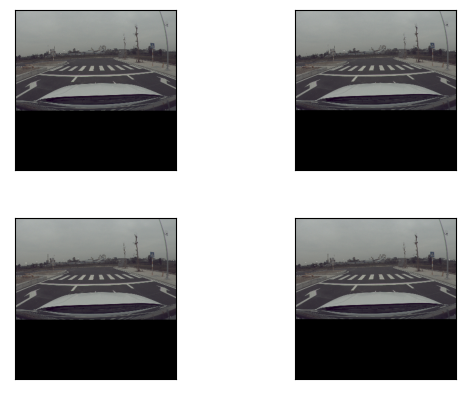

In [44]:
plot(y2)

In [45]:
# show(pads[0], dpi=20)